In [844]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
"""
OD_Matrix_pc_75.csv
population_pt_75.csv
OD_Matrix_pt_75.csv
population_pc_75.csv
population.csv
"""
percent_pop = "combined"
folder = "combined"
incubation = 7

melbourne_pc = pd.read_csv('data/'+folder+'/population_pc_'+percent_pop+'.csv', sep=',',header=None)
pop_pc       = melbourne_pc.values
pop_pc       = np.nan_to_num(pop_pc, copy = True)
pop_pc       = pop_pc.astype(int)

od_matrix_pc = genfromtxt('data/'+folder+'/OD_Matrix_pc_'+percent_pop+'.csv', delimiter=',')
od_matrix_pc = np.reshape(od_matrix_pc, (12,309,309))
od_matrix_pc = np.nan_to_num(od_matrix_pc, copy = True)
od_matrix_pc = od_matrix_pc.astype(int)

melbourne_pt = pd.read_csv('data/'+folder+'/population_pt_'+percent_pop+'.csv', sep=',',header=None)
pop_pt       = melbourne_pt.values
pop_pt       = np.nan_to_num(pop_pt, copy = True)
pop_pt       = pop_pt.astype(int)

od_matrix_pt = genfromtxt('data/'+folder+'/OD_Matrix_pt_'+percent_pop+'.csv', delimiter=',')
od_matrix_pt = np.reshape(od_matrix_pt, (12,309,309))
od_matrix_pt = np.nan_to_num(od_matrix_pt, copy = True)
od_matrix_pt = od_matrix_pt.astype(int)

#At this point only have 25% for pop and flow, now we scale them up


pop_pc = pop_pc*4
od_matrix_pc = od_matrix_pc*4

pop_pt = pop_pt*4
od_matrix_pt = od_matrix_pt*4

for i in range(1,12):
    pop_pc[i,:] = pop_pc[0,:]
    pop_pt[i,:] = pop_pt[0,:]

to_this_origin_pc   = np.sum(od_matrix_pc,axis = 1)
from_this_origin_pc = np.sum(od_matrix_pc,axis = 2)

to_this_origin_pt   = np.sum(od_matrix_pt,axis = 1)
from_this_origin_pt = np.sum(od_matrix_pt,axis = 2)

In [823]:
pop = np.sum(pop_pc,axis=1)[0] + np.sum(pop_pt,axis=1)[0]
pop

3325296

In [868]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import random
from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')

random.seed(30)

OD_id = [p for p in range (0,309)]

r = od_matrix_pc.shape[0]
n = pop_pc.shape[1]

initialInd = random.sample(OD_id,20)
initial = np.zeros(n)
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = incubation*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run SIR-mobility-mode.py

res = {}
iterations = 800
inf = 10

res['baseline'] = sir(model,pop_pc,od_matrix_pc,pop_pt,od_matrix_pt,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:54: RuntimeWarning: invalid value encountered in true_divide
  realflow_pc = realflow_pc / realflow_pc.sum(axis=2)[:,:, np.newaxis]
/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:57: RuntimeWarning: invalid value encountered in true_divide
  realflow_pt = realflow_pt / realflow_pt.sum(axis=2)[:,:, np.newaxis]


In [846]:
newI_inf = res['baseline'][4] + res['baseline'][5] 

newI_inf.astype(int)

newI_inf = np.sum(newI_inf,axis=0)


In [843]:
newI_base = res['baseline'][4] + res['baseline'][5] 

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)


In [847]:
newI = newI_inf - newI_base  
newI = newI.astype(int)
#newI =  np.where(newI < 0, 0, newI) 
newI

array([-2407, -1992, -3400, -4826, -1544,  -820, -3120, -1469, -2869,
       -3622, -1738, -2122, -2773, -2939, -3558, -3575, -3082, -2494,
       -3591, -5022, -1619, -2608, -3371, -3054, -1596, -2538, -3566,
       -2035, -3490,  -522, -5362, -3055, -1517, -4107, -2039, -2497,
       -2302, -5513, -3876, -4303,  -831, -4457, -2027, -5083, -2716,
       -2284, -1288, -3781, -4707, -6903, -8592, -5763, -4644, -1999,
       -4894, -3190, -6263, -3484, -3090, -1899, -2640, -3940, -2919,
        -629, -2018, -4228, -4075, -5249, -2794, -4061, -4089, -1500,
       -2434, -3867, -3359, -4070, -1472, -7334, -4367, -5422, -1563,
       -3092, -1803, -4664, -4096, -3875, -3061, -1181, -4098, -2850,
       -4356, -2239, -3102, -1498, -6458, -3495, -2863, -3568, -1752,
       -3422, -1768, -3675, -2061,  -919, -1452, -2512, -1924, -3668,
       -3931, -4348,  -284, -6232, -1065, -4261, -2739, -3392, -3962,
       -2369, -2508, -3156, -4759, -3012, -3345, -2566, -7910, -2215,
       -3581, -1357,

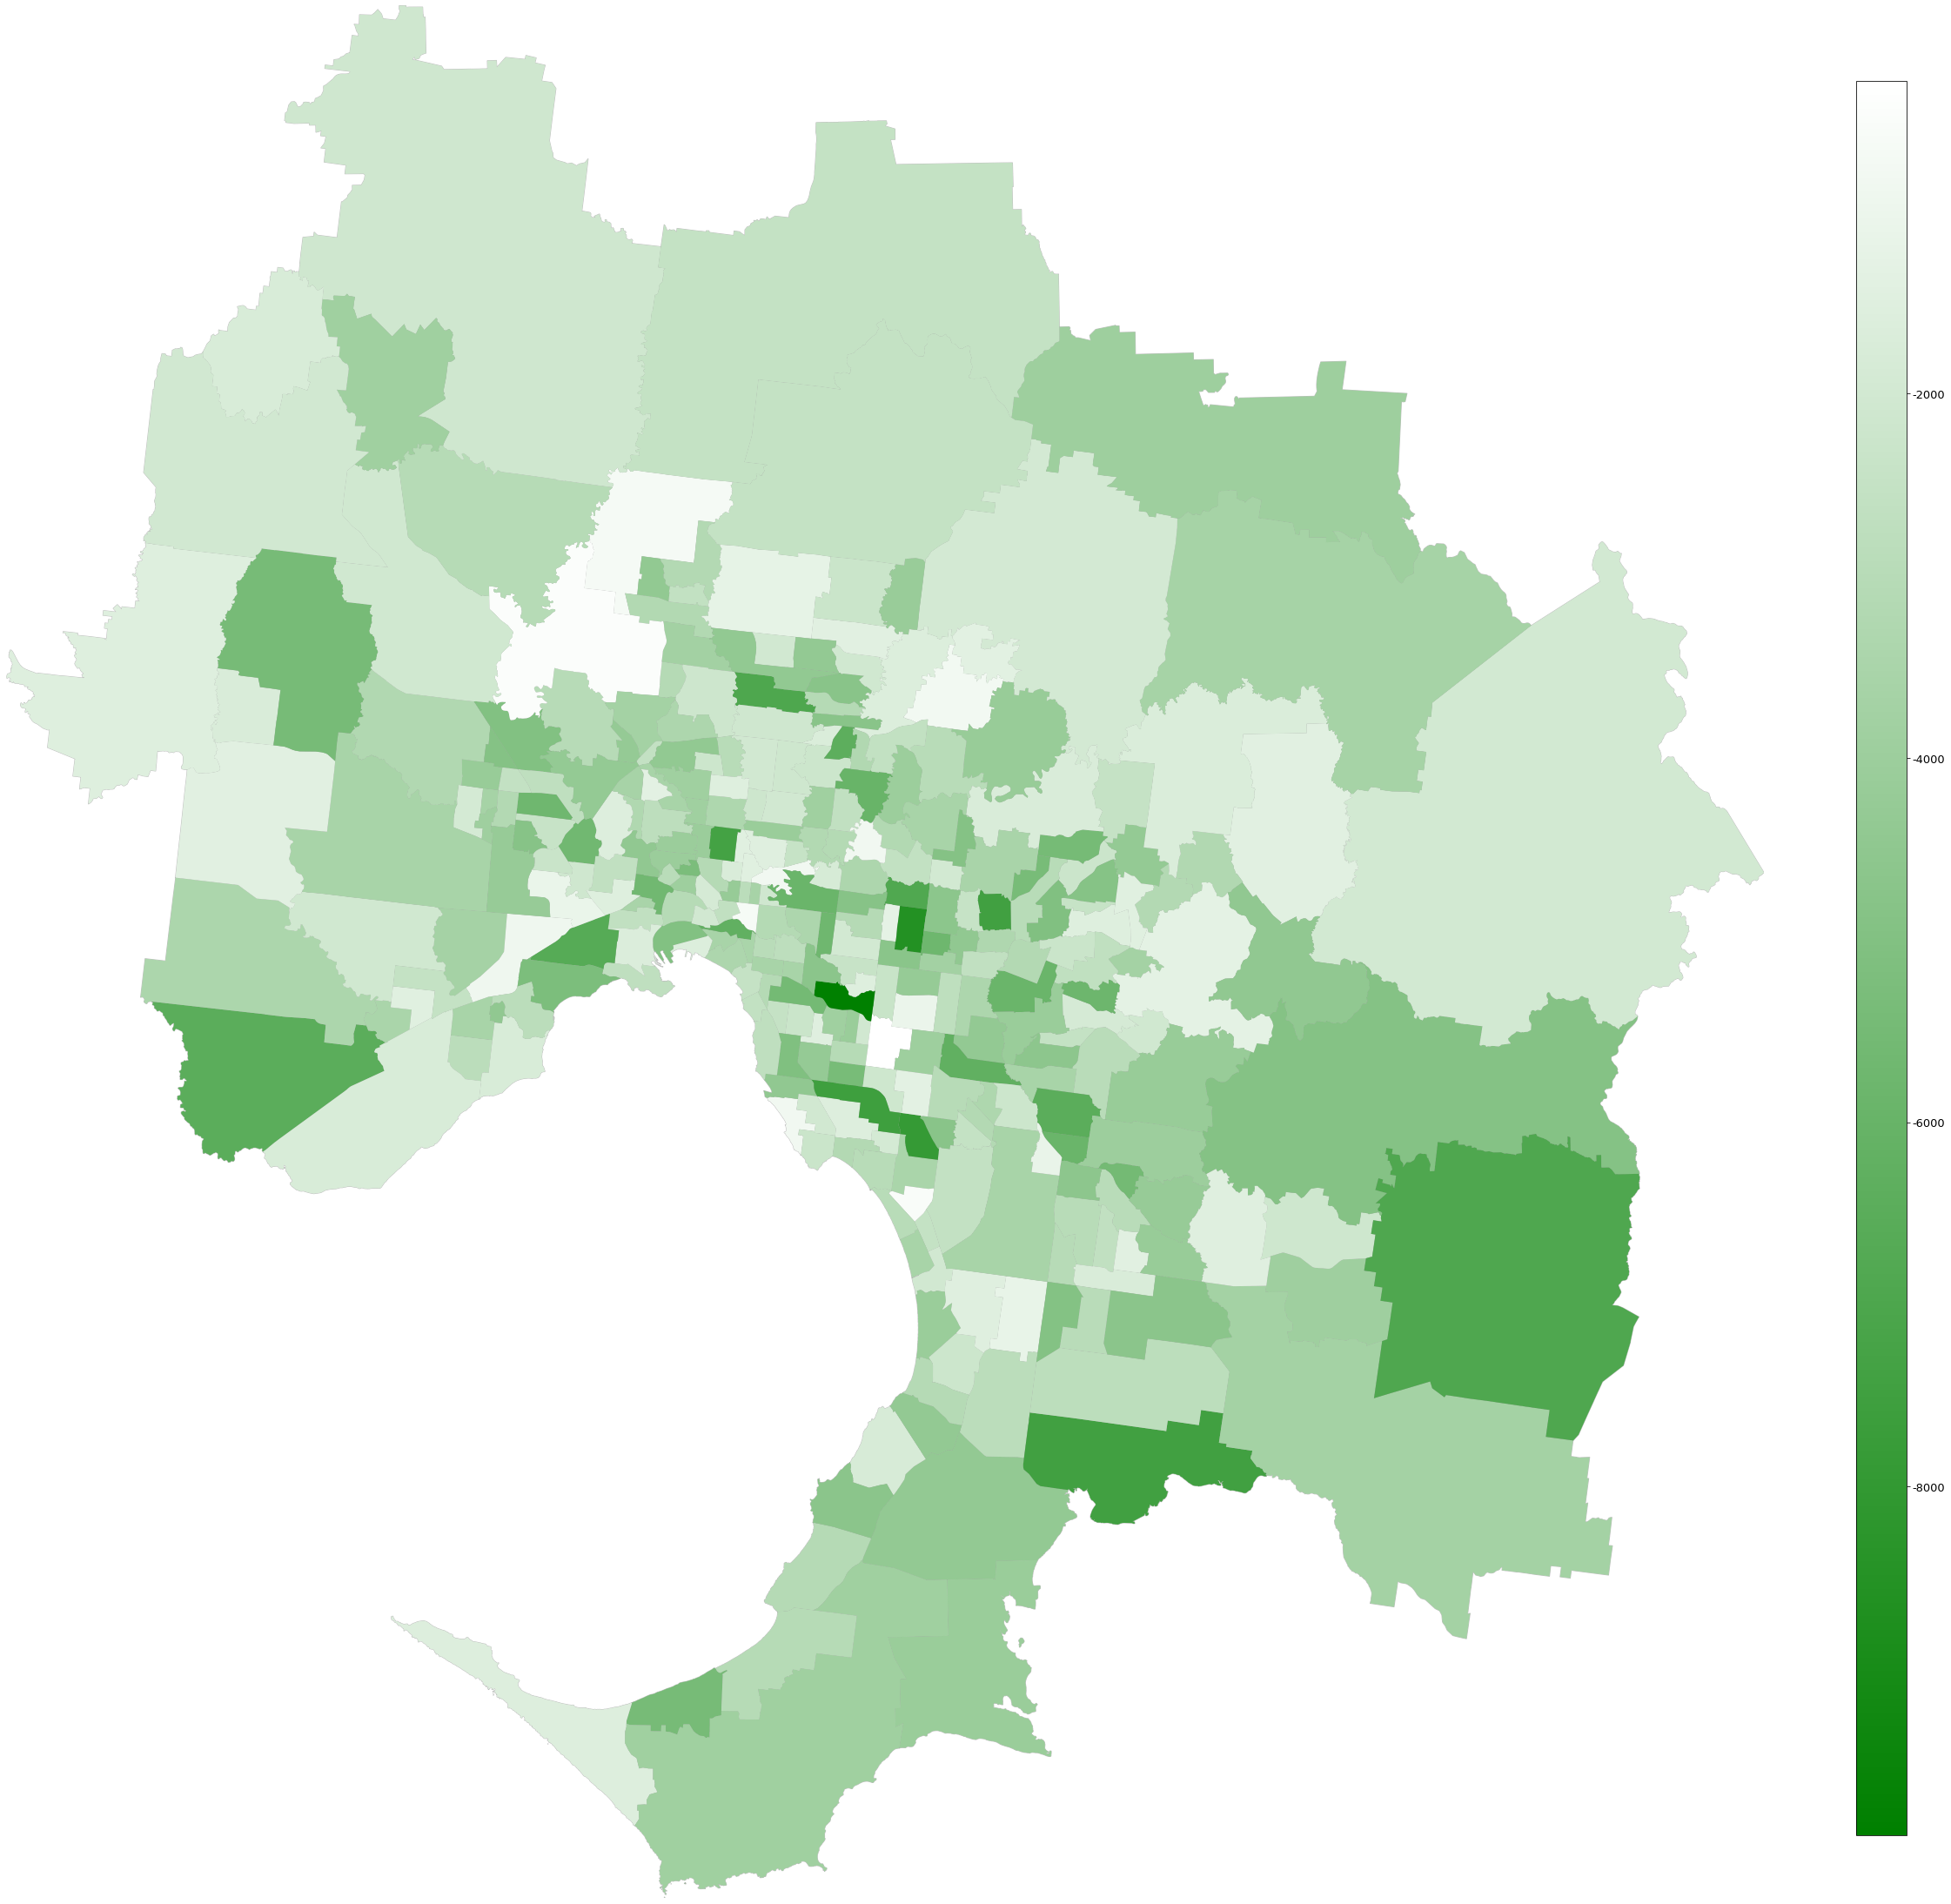

In [849]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])
melbourne_gdf.plot(ax=ax,facecolor='none',edgecolor='gray',alpha=0.5,linewidth=1,zorder=2)
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap,zorder=3)
cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),
                                             vmax=max(melbourne_gpd.population)))

sm._A=[]

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
combine_folder = '/Users/cptnemo2005/Desktop/SEIR/results/combinedpolicies/'
plt.savefig(stg_folder+'base_vs_'+percent_pop+'-'+str(iterations)+'-iterations.jpg')
#plt.savefig(work_restriction_result+'base_vs_work_'+percent_pop+'-'+str(iterations)+'-iterations.jpg')
#plt.savefig(work_restriction_result + 'base_case_{}.jpg'.format(iterations))

plt.show()

In [690]:
total_infect = np.sum(res['baseline'][4]) + np.sum(res['baseline'][5])
total_infect

10522.923920202335

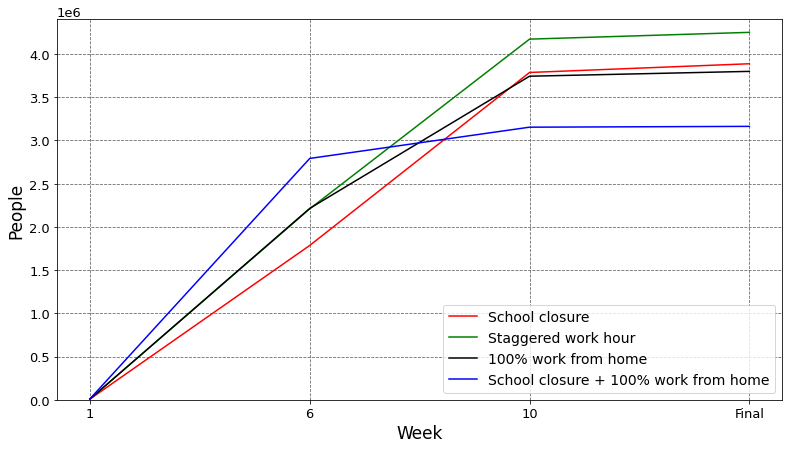

In [864]:
agg_base_case         = np.array([8628,2214375,4170893,4248774])
agg_sc                = np.array([8015,1784815,3784891,3885712])
agg_staggered         = np.array([9324,2208397,4170446,4248850])
agg_i_work_0          = np.array([8099,2213348,3741663,3797624])
agg_i_combine         = np.array([10522,2790937,3152355,3161665])
results = '/Users/cptnemo2005/Desktop/SEIR/results/'
def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4400000,1)
    plt.xlabel("Week",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    #plt.plot(x, color='red',label='SIR-M base case')
    plt.plot(y, color='red',label='School closure ')
    plt.plot(z, color='green',label='Staggered work hour')
    plt.plot(b, color='black',label='100% work from home')
    plt.plot(a, color='blue',label='School closure + 100% work from home')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':14})
    plt.savefig(results + 'agg-policies-'+ str(incubation)+ '.jpg')
    
sir_plot_r(agg_base_case,
           agg_sc,
           agg_staggered, 
           agg_i_combine,
           agg_i_work_0)

In [668]:
_sc         = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [697]:
_staggered  = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [684]:
_i_combine  = res['baseline'][2][::12,1] + res['baseline'][0][::12,1] 

In [743]:
location_1 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [745]:
location_5 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [747]:
location_10 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [749]:
location_15 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [754]:
location_20 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [751]:
location_30 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [720]:
incubation_5 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [723]:
incubation_7 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [726]:
incubation_9 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [729]:
incubation_11 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [734]:
incubation_13 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [737]:
incubation_15 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

'    \n\n \nsir_plot_r(incubation_5,\n           incubation_7,\n           incubation_9,\n           incubation_11,\n          incubation_13,\n          incubation_15)\n\nsir_plot_r(location_1,\n          location_5,\n          location_10,\n          location_15,\n          location_20,\n          location_30)   \n\n'

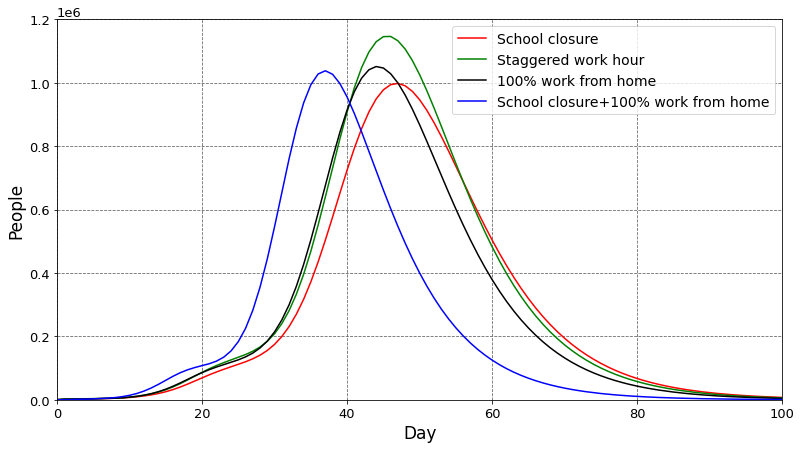

In [874]:
work_restriction_result = '/Users/cptnemo2005/Desktop/SEIR/results/workrestriction/'

def sir_plot_r(x,y,z,a):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='red',label='School closure')
    plt.plot(y, color='green',label='Staggered work hour')
    plt.plot(a, color='k',label='100% work from home')
    plt.plot(z, color='blue',label='School closure+100% work from home')
    #plt.plot(b, color='c',label='20')
    #plt.plot(c, color='m',label='30')
    #plt.plot(c, color='k',label='30')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':14})
    
    plt.savefig(results + 'policies-'+str(incubation)+ '.jpg')

    
sir_plot_r(
           _sc,
           _staggered,
           _i_combine,
          _i_work_0) 

"""    

 
sir_plot_r(incubation_5,
           incubation_7,
           incubation_9,
           incubation_11,
          incubation_13,
          incubation_15)

sir_plot_r(location_1,
          location_5,
          location_10,
          location_15,
          location_20,
          location_30)   

"""    


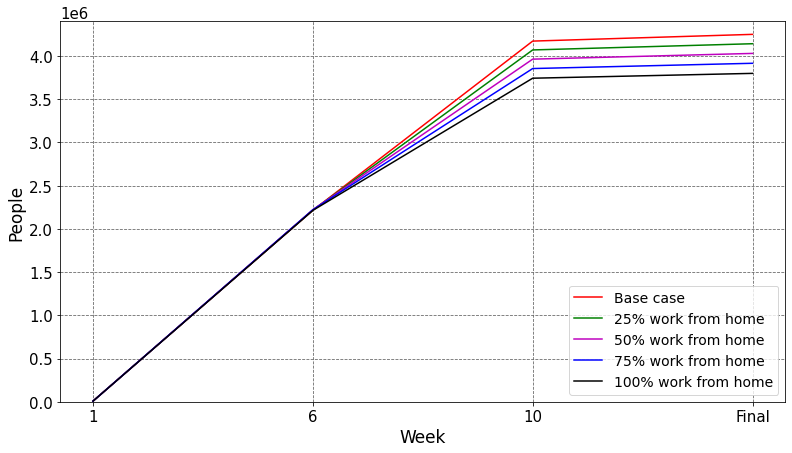

In [865]:
agg_base_case         = np.array([8628,2214375,4170893,4248774])
agg_i_work_75         = np.array([8543,2216661,4068657,4140470])
agg_i_work_50         = np.array([8460,2221087,3962157,4028456])
agg_i_work_25         = np.array([8301,2220891,3853456,3914310])
agg_i_work_0          = np.array([8099,2213348,3741663,3797624])


def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4400000,1)
    plt.xlabel("Week",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='red',label='Base case')
    plt.plot(y, color='green',label='25% work from home')
    plt.plot(z, color='m',label='50% work from home')
    plt.plot(a, color='blue',label='75% work from home')
    plt.plot(b, color='black',label='100% work from home')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':14})
    plt.savefig(work_restriction_result + 'agg-work-restriction-level-incubation-'+ str(incubation)+ '.jpg')
    
sir_plot_r(agg_base_case,
           agg_i_work_75,
           agg_i_work_50, 
           agg_i_work_25,
           agg_i_work_0)

(256, 4)
[[1.         0.96078431 0.94117647 1.        ]
 [0.99987697 0.95820069 0.93748558 1.        ]
 [0.99975394 0.95561707 0.93379469 1.        ]
 ...
 [0.41917724 0.00369089 0.05294887 1.        ]
 [0.4115494  0.00184544 0.05196463 1.        ]
 [0.40392157 0.         0.05098039 1.        ]]


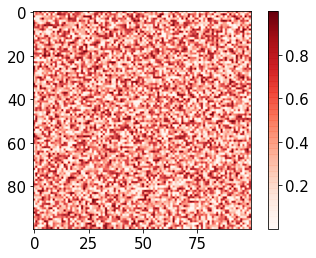

In [305]:
ncolors  = 256

color_array = plt.get_cmap('Reds')(range(ncolors))
print(color_array.shape)
print(color_array)

color_array[:,-1] = np.linspace(0.3,1,ncolors)
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp", colors = color_array)

plt.register_cmap(cmap = map_object)
fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='Reds_transp')
plt.colorbar(mappable=h)

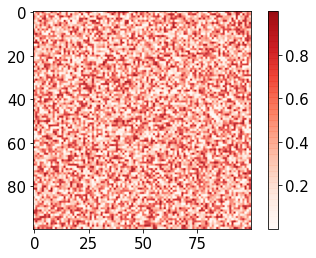

In [306]:
def trunc_colormap(cmap,minval=0.0,maxval= 1.0,n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval,b=maxval),
                                                cmap(np.linspace(minval,maxval,n)))
    return new_cmap
cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap,0.0,.9)

fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

3776506.181287417

In [446]:
_i_go_work_75 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [449]:
_i_go_work_50 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [452]:
_i_go_work_25 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [443]:
_i_work_0     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [440]:
base_case     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

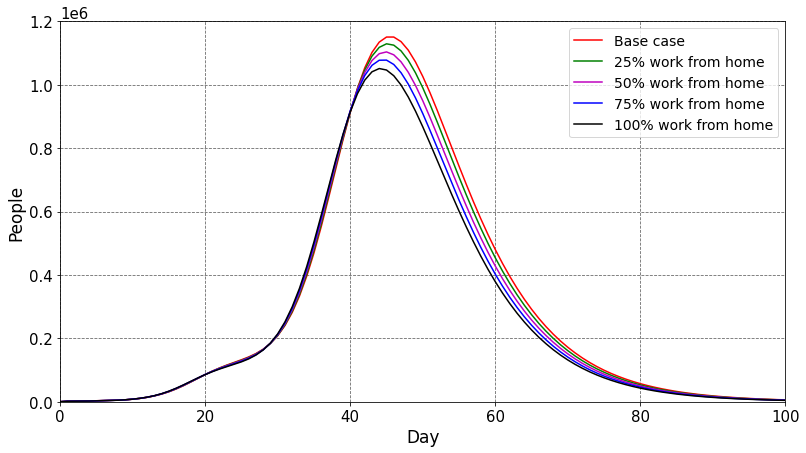

In [866]:
work_restriction_result = '/Users/cptnemo2005/Desktop/SEIR/results/workrestriction/'

def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='red',label='Base case')
    plt.plot(y, color='green',label='25% work from home ')
    plt.plot(z, color='m',label='50% work from home')
    plt.plot(a, color='blue',label='75% work from home')
    plt.plot(b, color='black',label='100% work from home')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':14})
    
    plt.savefig(work_restriction_result + 'work-restriction-level-incubation-'+ str(incubation)+ '.jpg')
    
sir_plot_r(base_case,
           _i_go_work_75,
           _i_go_work_50,
           _i_go_work_25,
          _i_work_0) 

In [78]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

EPSIM_sc_wfh         = episim_data['sc_wfh']
EPSIM_sc       = episim_data['sc']
EPSIM_base = episim_data['Base case']
EPSIM_FROM_HOME = episim_data['Work from home']
EPSIM_50_FROM_HOME = episim_data['50% Work from home']

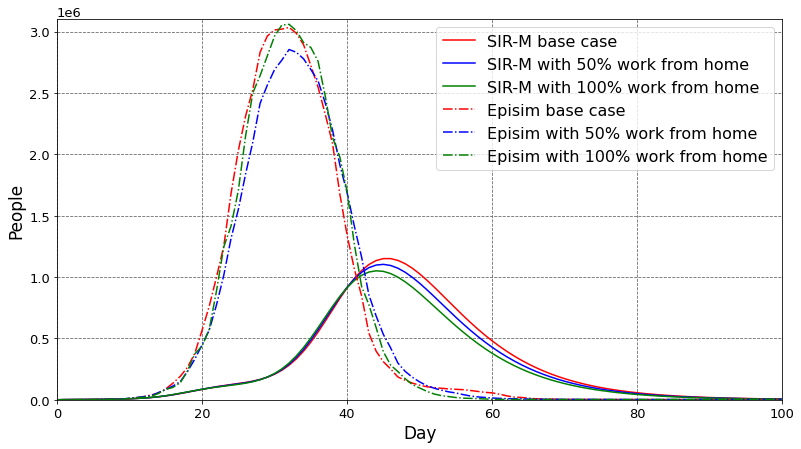

In [876]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 3100000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='r',label='SIR-M base case')
    plt.plot(y, color='b',label='SIR-M with 50% work from home')
    plt.plot(z, color='g',label='SIR-M with 100% work from home')
    plt.plot(a, color='r',label='Episim base case',linestyle='-.')
    plt.plot(b, color='b',label='Episim with 50% work from home',linestyle='-.')
    plt.plot(c, color='g',label='Episim with 100% work from home',linestyle='-.')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':16})
    
    #plt.savefig('new.jpg')
    
sir_plot_r(base_case,
          _i_go_work_50,
          _i_work_0,
          EPSIM_base,
          EPSIM_FROM_HOME,
          EPSIM_50_FROM_HOME) 